In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
class Conv:
    def __init__(self, W):
        self.W = W
    def f_prop(self, X):
#         print("Conv.f_prop X.shape", X.shape)
        out = np.zeros((X.shape[0]-2, X.shape[1]-2))
#         print("Conv.f_prop out", out)
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                x = X[i:i+3, j:j+3]
                out[i, j] = np.dot(self.W.flatten(), x.flatten())
        return out

In [24]:
class Pool:
    def __init__(self, l):
        self.l = l
    def f_prop(self, X):
        l = self.l
#         print("Pool.f_prop X.shape", X.shape)
        out = np.zeros((X.shape[0]//self.l, X.shape[1]//self.l))
#         print("Pool.f_prop out", out)
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                out[i,j] = np.max(X[i*l:(i+1)*l, j*l:(j+1)*l])
        return out

In [25]:
# 0
X = np.array([[0,0,0,0,0,0,0,0,0,0],
              [0,0,0,1,1,1,1,0,0,0],
              [0,0,1,0,0,0,0,1,0,0],
              [0,1,0,0,0,0,0,0,1,0],
              [0,1,0,0,0,0,0,0,1,0],
              [0,1,0,0,0,0,0,0,1,0],
              [0,1,0,0,0,0,0,0,1,0],
              [0,0,1,0,0,0,0,1,0,0],
              [0,0,0,1,1,1,1,0,0,0],
              [0,0,0,0,0,0,0,0,0,0]])

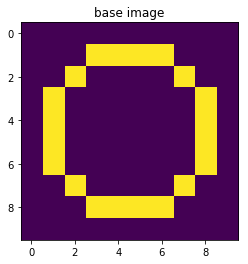

In [26]:
plt.imshow(X)
plt.title("base image", fontsize=12)
plt.show()

In [27]:
# フィルター
W1 = np.array([[0,1,0],
               [0,1,0],
               [0,1,0]])
W2 = np.array([[0,0,0],
               [1,1,1],
               [0,0,0]])
W3 = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])
W4 = np.array([[0,0,1],
               [0,1,0],
               [1,0,0]])

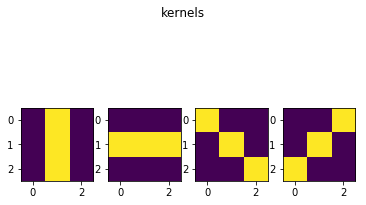

In [28]:
plt.subplot(1,4,1)
plt.imshow(W1)
plt.subplot(1,4,2)
plt.imshow(W2)
plt.subplot(1,4,3)
plt.imshow(W3)
plt.subplot(1,4,4)
plt.imshow(W4)
plt.suptitle("kernels", fontsize=12)
plt.show()

In [29]:
# 畳み込み
conv1 = Conv(W1)
C1 = conv1.f_prop(X)

conv2 = Conv(W2)
C2 = conv2.f_prop(X)

conv3 = Conv(W3)
C3 = conv3.f_prop(X)

conv4 = Conv(W4)
C4 = conv4.f_prop(X)

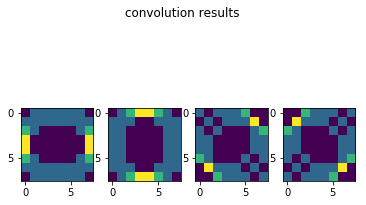

In [30]:
plt.subplot(1,4,1)
plt.imshow(C1)
plt.subplot(1,4,2)
plt.imshow(C2)
plt.subplot(1,4,3)
plt.imshow(C3)
plt.subplot(1,4,4)
plt.imshow(C4)
plt.suptitle("convolution results", fontsize=12)
plt.show()

In [31]:
# プーリング
pool = Pool(2)
P1 = pool.f_prop(C1)
P2 = pool.f_prop(C2)
P3 = pool.f_prop(C3)
P4 = pool.f_prop(C4)

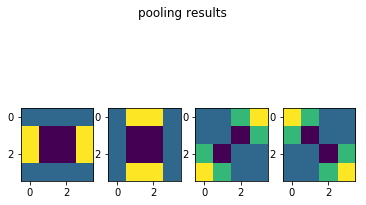

In [32]:
plt.subplot(1,4,1); plt.imshow(P1)
plt.subplot(1,4,2); plt.imshow(P2)
plt.subplot(1,4,3); plt.imshow(P3)
plt.subplot(1,4,4); plt.imshow(P4)
plt.suptitle("pooling results", fontsize=12)
plt.show()